In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv('sample_data/mnist_train_small.csv', header=None)

In [3]:
columns = list(train_df.columns)
columns.remove(0)
train_X = train_df[columns].values.reshape((-1, 28, 28))
train_y = train_df[[0]].values

/Users/frankie/.conda/envs/pythonProject/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


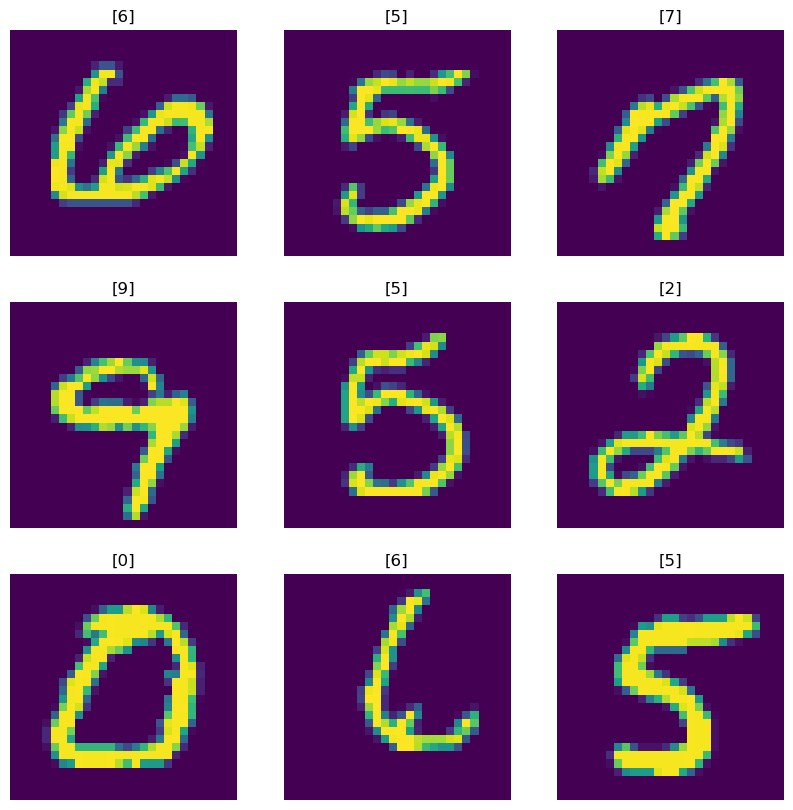

In [4]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(train_X[i])
  plt.axis('off')
  plt.title(train_y[i])
plt.show()

In [6]:
test_df = pd.read_csv('sample_data/mnist_test.csv', header=None)
columns = list(test_df.columns)
columns.remove(0)
test_X = test_df[columns].values.reshape((-1, 28, 28))[:1000]
test_y = test_df[[0]].values[:1000]

In [7]:
def euclidean(points1, point2):
	dist = np.sqrt(np.sum(np.square(points1 - point2), axis=(1, 2)))
	return dist


def manhattan(points1, point2):
	dist = np.sum(np.abs(points1 - point2), axis=(1, 2))
	return dist

In [8]:
class KNeighboursClassifier:
	def __init__(self, k_neighbours=2, metric='Euclidean'):
		self.k_neighbours = k_neighbours
		self.x_points = None
		self.y_points = None
		self.metric = metric.lower()

	def fit(self, X, y):
		self.x_points = X
		self.y_points = y
		return self

	def predict(self, points):
		if len(points.shape) < 3:
			raise AssertionError(f"Not enough dimensions to unpack. "
								 f"Expect dims: 3, got: {len(points.shape)}")
		predictions = np.zeros((len(points), 1))
		for idx, point in tqdm(enumerate(points)):
			if self.metric == 'euclidean':
				distances = euclidean(self.x_points, point)
			elif self.metric == 'manhattan':
				distances = manhattan(self.x_points, point)
			else:
				distances = euclidean(self.x_points, point)

			sorted_args = np.argsort(distances)[:self.k_neighbours]
			predicted_classes = self.y_points[sorted_args]
			class_vals, val_counts = np.unique(predicted_classes, return_counts=True)
			predictions[idx, 0] = class_vals[np.argmax(val_counts)]
		return predictions

In [9]:
classifier = KNeighboursClassifier(k_neighbours=10)
classifier.fit(train_X, train_y)

predictions = classifier.predict(test_X)

1000it [02:46,  5.99it/s]


In [10]:
accuracy = (np.sum(test_y == predictions))/len(predictions)
print(accuracy)

0.925


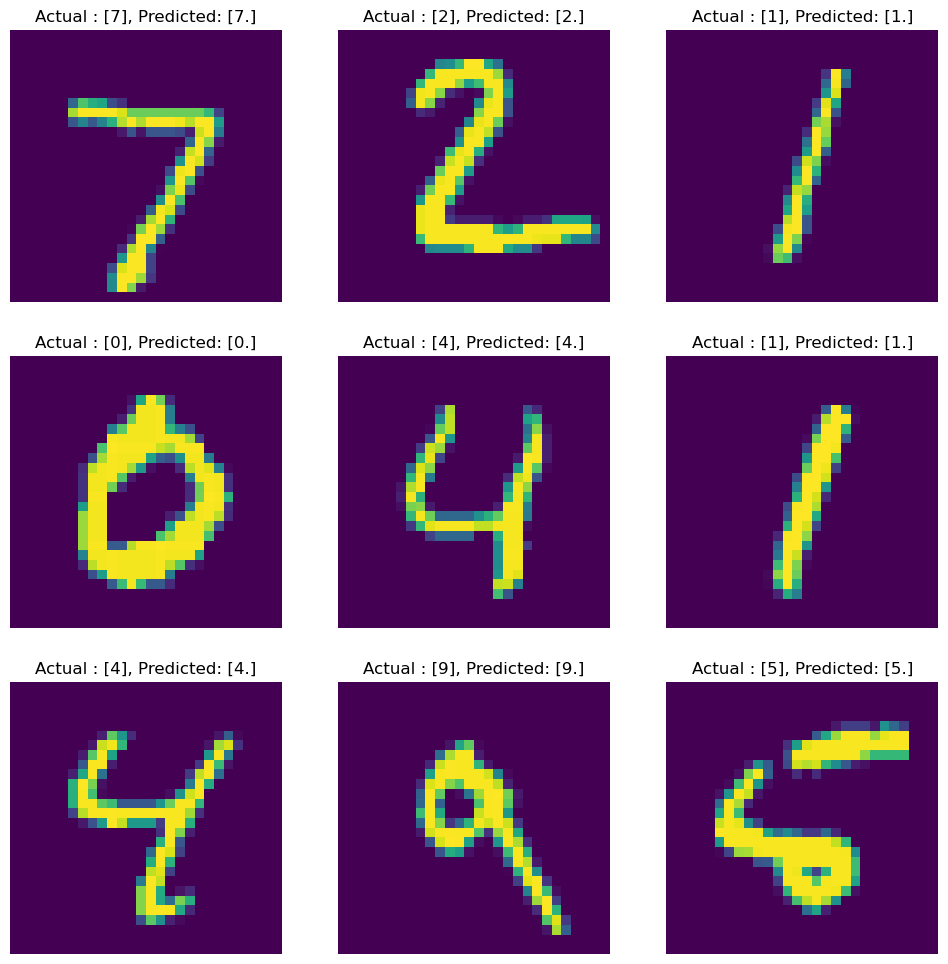

In [11]:
plt.figure(figsize=(12, 12))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(test_X[i])
  plt.axis('off')
  plt.title(f"Actual : {test_y[i]}, Predicted: {predictions[i]}")
plt.show()